# COMP4318/COMP5318 Assignment 2

In this template, we have provided data loading code and section headings to help structure your notebook. Please refer to the assignment specification pdf to guide the content of your notebook and report.


(Add SIDs here)

# Setup

In [1]:
# Please include your imports in this cell
import numpy as np
#import keras
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation
from keras.layers import BatchNormalization
from keras.layers import LeakyReLU
from keras.regularizers import l2
from tensorflow.keras.optimizers import SGD ##needs to be changed to keras
import imblearn
import sklearn

from scikeras.wrappers import KerasClassifier

from  sklearn import metrics
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import validation_curve
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

# Data loading, exploration, and preprocessing

## Data loading

In [2]:
# Load data files assuming Assignment2Data folder 
# is present in the same directory as the notebook
X_train = np.load('Assignment2Data/X_train.npy')
y_train = np.load('Assignment2Data/y_train.npy')
X_test = np.load('Assignment2Data/X_test.npy')
y_test = np.load('Assignment2Data/y_test.npy')

In [3]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(13673, 28, 28, 3)
(3419, 28, 28, 3)
(13673,)
(3419,)


In [ ]:
X_train.dtype

In [ ]:
y_train.dtype

In [ ]:
unique_values, unique_indices = np.unique(y_train, return_index=True)
sorted_arr = y_train[unique_indices]
print(sorted_arr)

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
unique_values_1, counts_1 = np.unique(y_train, return_counts=True)
unique_values_2, counts_2 = np.unique(y_test, return_counts=True)

plt.subplot(1,2,1)
plt.bar(unique_values_1, counts_1)
plt.xlabel('Group No.')
plt.ylabel('Counts')
plt.ylim(bottom = 0, top = 3000)
plt.title('Group counts in y_train subset')

plt.subplot(1,2,2)
plt.bar(unique_values_2, counts_2)
plt.xlabel('Group No.')
plt.ylabel('Counts')
plt.title('Group counts in y_test subset')
plt.ylim(bottom = 0, top = 3000)
plt.show()

In [ ]:
class_names = sorted_arr

plt.figure(figsize=(10,10))
for i in range(49):
    plt.subplot(7,7,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i])
    plt.xlabel(y_train[i])
plt.show()


In [ ]:
#DownScaling

In [3]:
#Normalizing
X_train_n = X_train /255
X_test_n = X_test /255

In [4]:
#Catagorizing
num_classes = 8
y_train_c = keras.utils.to_categorical(y_train, num_classes)
y_test_c = keras.utils.to_categorical(y_test, num_classes)

In [28]:
X_train_r =  np.reshape(X_train, (X_train.shape[0], -1))
X_test_r = np.reshape(X_test, (X_test.shape[0], -1))

X_train_r_n =  X_train_r/255.0
X_test_r_n = X_test_r/255.0

In [9]:
y_test_c[0]

array([0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [10]:
X_train_n.shape[1:]

(28, 28, 3)

In [19]:
def create_MLPmodel(neurons, dropout_rate, activation,):
    model = Sequential()
    model.add(Flatten(input_shape=[28, 28, 3]))
    model.add(Dense(neurons, activation=activation))
    model.add(Dropout(dropout_rate))
    model.add(Dense(neurons/2, activation=activation))
    model.add(Dropout(dropout_rate))
    model.add(Dense(neurons/4, activation=activation))
    model.add(Dropout(dropout_rate))
    model.add(Dense(8, activation="softmax"))

    model.compile(loss='categorical_crossentropy',
              optimizer='Adam',
              metrics= ['categorical_accuracy'])

    return model

model_mlp = KerasClassifier(model=create_MLPmodel,verbose=0)

neurons = [128]
dropout_rate = [0.01]
activation = ['relu']

optimizer = ['Adam']
batch_size = [32]
epochs = [10]
param_grid = dict(model__neurons=neurons, 
                    model__dropout_rate=dropout_rate,
                    model__activation=activation,
                    batch_size = batch_size,
                    epochs = epochs
                  )

grid = GridSearchCV(estimator=model_mlp, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X_train_n, y_train_c)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

2023-10-05 17:03:50.178810: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-10-05 17:03:50.190960: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-10-05 17:03:50.212165: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-10-05 17:03:50.217214: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-10-05 17:03:50.776790: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-10-05 17:03:51.416414: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-10-05 17:05:31.126649: I tensorflow/core/grappler/optimizers/cust

Best: 0.563453 using {'batch_size': 64, 'epochs': 10, 'model__activation': 'relu', 'model__dropout_rate': 0.01, 'model__neurons': 128}
0.539243 (0.091208) with: {'batch_size': 32, 'epochs': 10, 'model__activation': 'relu', 'model__dropout_rate': 0.01, 'model__neurons': 128}
0.563453 (0.075597) with: {'batch_size': 64, 'epochs': 10, 'model__activation': 'relu', 'model__dropout_rate': 0.01, 'model__neurons': 128}


In [26]:
def create_ConVmodel(activation):
    model = Sequential()
        # Layer 1: Convolutional layer with 64 filters
    model.add(Conv2D(64, (3, 3), padding='same',input_shape=X_train_n.shape[1:],activation=activation))
    model.add(BatchNormalization())

        # Layer 2: Convolutional layer with 64 filters
    model.add(Conv2D(64, (3, 3), activation=activation))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

        # Layer 3: Convolutional layer with 128 filters
    model.add(Conv2D(128, (3, 3), padding='same', activation=activation))
    model.add(BatchNormalization())

        # Layer 4: Convolutional layer with 128 filters
    model.add(Conv2D(128, (3, 3), activation=activation))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    # Layer 5: Fully connected layer with 512 units and L2 regularizatio
    model.add(Dense(512,kernel_regularizer=l2(0.01), activation=activation))
    model.add(Dropout(0.5))
        # Output layer: Fully connected layer with num_classes units for classification
    model.add(Dense(num_classes))
    model.add(Activation('softmax'))

    model.compile(loss='categorical_crossentropy',
                optimizer='adam',
                metrics= ['categorical_accuracy'])
    return model

model_conv = KerasClassifier(model=create_ConVmodel,verbose=0)

batch_size = [32]
epochs = [3]
activation = ['relu', 'tanh']
param_grid = dict(batch_size = batch_size,
                epochs = epochs,
                model__activation=activation
                  )

num_classes = 8

# history_cnn = model_conv.fit(X_train_n, y_train_c,batch_size=batch_size,epochs=epochs,validation_data=(X_test_n, y_test_c),shuffle=True,
#                     )
grid = GridSearchCV(estimator=model_conv, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X_train_n, y_train_c)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

2023-10-05 17:25:45.652680: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2023-10-05 17:25:45.652715: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2023-10-05 17:25:45.652723: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2023-10-05 17:25:45.652757: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:303] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-10-05 17:25:45.652778: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:269] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2023-10-05 17:25:45.655280: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2023-10-05 17:25:45.655311: I metal_plugin/src/device/metal_device.cc:296] syste

Best: 0.657135 using {'batch_size': 32, 'epochs': 3, 'model__activation': 'relu'}
0.657135 (0.093786) with: {'batch_size': 32, 'epochs': 3, 'model__activation': 'relu'}
0.632499 (0.118175) with: {'batch_size': 32, 'epochs': 3, 'model__activation': 'tanh'}


In [ ]:
#SVM
pipe1 = Pipeline([('classifier', SVC(kernel='linear', C = 1))])
pipe1.fit(X_train_r_n, y_train)

acc = cross_val_score(pipe1, X_train_r_n, y_train, cv = 5)
print("Training Acc = {:.2f}".format(acc.mean()))

y_pred = pipe1.predict(X_test_r_n)
cm = confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title('Confusion Matrix for SVM')
plt.show()

In [29]:
##Random forest ensemble method
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier(random_state=2023)

n_estimators = [100, 200]
max_features = ['auto', 'sqrt', 'log2']
max_depth = [3,4,5,6]
criterion = ['gini', 'entropy']

param_grid = dict(
    n_estimators = n_estimators,
    max_depth = max_depth,
    max_features = max_features,
    criterion = criterion
)

grid = GridSearchCV(estimator=model_rf, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X_train_r_n, y_train_c)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

# y_pred = model_rf.predict(X_test_r_n)
# accuracy_score(y_pred,y_test)
# print(classification_report(y_pred,y_test))
# cm = confusion_matrix(y_test,y_pred)
# disp = ConfusionMatrixDisplay(confusion_matrix=cm)
# disp.plot()
# plt.title('Confusion Matrix for Random Forest')
# plt.show()

Best: 0.439041 using {'criterion': 'entropy', 'max_depth': 6, 'max_features': 'sqrt', 'n_estimators': 200}
nan (nan) with: {'criterion': 'gini', 'max_depth': 3, 'max_features': 'auto', 'n_estimators': 100}
nan (nan) with: {'criterion': 'gini', 'max_depth': 3, 'max_features': 'auto', 'n_estimators': 200}
0.161633 (0.002621) with: {'criterion': 'gini', 'max_depth': 3, 'max_features': 'sqrt', 'n_estimators': 100}
0.160389 (0.003493) with: {'criterion': 'gini', 'max_depth': 3, 'max_features': 'sqrt', 'n_estimators': 200}
0.125503 (0.003359) with: {'criterion': 'gini', 'max_depth': 3, 'max_features': 'log2', 'n_estimators': 100}
0.125942 (0.002828) with: {'criterion': 'gini', 'max_depth': 3, 'max_features': 'log2', 'n_estimators': 200}
nan (nan) with: {'criterion': 'gini', 'max_depth': 4, 'max_features': 'auto', 'n_estimators': 100}
nan (nan) with: {'criterion': 'gini', 'max_depth': 4, 'max_features': 'auto', 'n_estimators': 200}
0.259929 (0.006343) with: {'criterion': 'gini', 'max_depth': 

              precision    recall  f1-score   support

           0       0.49      0.73      0.58       163
           1       0.93      0.90      0.92       640
           2       0.79      0.89      0.84       275
           3       0.81      0.64      0.72       733
           4       0.80      0.81      0.80       239
           5       0.51      0.84      0.64       174
           6       0.94      0.86      0.90       723
           7       1.00      0.99      1.00       472

    accuracy                           0.83      3419
   macro avg       0.78      0.83      0.80      3419
weighted avg       0.85      0.83      0.84      3419



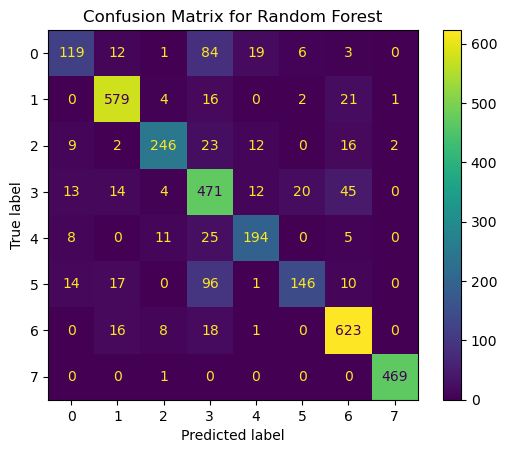

In [31]:
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier(random_state=2023)
model_rf.fit(X_train_r_n, y_train)
y_pred = model_rf.predict(X_test_r_n)
accuracy_score(y_pred,y_test)
print(classification_report(y_pred,y_test))
cm = confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title('Confusion Matrix for Random Forest')
plt.show()

## Data exploration

## Preprocessing

## Examples of preprocessed data
Please print/display some examples of your preprocessed data here. 

# Algorithm design and setup

## Model 1 - Fully Connected Neural Network

## Model 2 - Convolutional Neural Network

## Model 3 - Algorithm Choice 1

## Model 4 - Algorithm Choice 2

# Hyperparameter tuning

## Model 1 - Fully Connected Neural Network

## Model 2 - Convolutional Neural Network

## Model 3 - Algorithm Choice 1

## Model 4 - Algorithm Choice 2

# Final Models

## Model 1 - Fully Connected Neural Network

## Model 2 - Convolutional Neural Network

## Model 3 - Algorithm Choice 1

## Model 4 - Algorithm Choice 2